***
<h2>CREDIT CARD DEFAULTS</h2>  
*** 

<h3> The Data: </h3>  
<p>UC Irvine Machine Learning Repository has a file on credit card defaults from Taiwan in 2005.    https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients  
The set of 30,000 includes whether the account defaulted in the next month, as well as demographic and account data, including: gender, marital status, education attained, age, amount of household credit, and 6 month history of credit balance, payments, and defaults. 
(In 2003, the exchange rate was 1USD to 34 Taiwanese Dollars.) </p>

<div class="span5 alert alert-info">
<p>Attribute Information:
<p>
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:  

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  

SEX: Gender (1 = male; 2 = female).  

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).   

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).  

AGE: Age (year).  

PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005.  
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.  

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.  </p>
</div>

<h3> Exploratory Data Analysis </h3>
First, look at the data structure.
I will plot some histograms, boxplots and violin plots (too many data points for swarmplots.) 
Look at the distributions and look for patterns.  Also look for missing data, outliers, and incorrect data.  
Eventually, I will look for correlations between the variables and the response variable.

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale

cc_file = '/Users/brentmarijensen/Desktop/credit_card.xls'
df = pd.read_excel(cc_file,header=1)
target = 'default payment next month'
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


'default payment next month' is the response variable.  First, look at the proportion of defaulted accounts

COUNT: 1 measures defaulting accounts, 0 measures paid accounts
this will be the target/predicted value
1     6636
0    23364
Name: default payment next month, dtype: int64

defaulting accounts are 22.12% out of 30000 observations


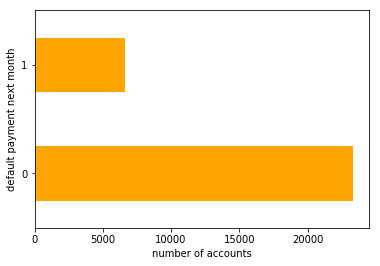

In [5]:
#look at the proportion of defaulting accounts
%matplotlib inline
print('COUNT: 1 measures defaulting accounts, 0 measures paid accounts')
print('this will be the target/predicted value')
print(df['default payment next month'].value_counts(ascending=True))
print('')
d= df.groupby(['default payment next month']).size()
print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))

_= d.plot(kind='barh', color='orange')
_= plt.xlabel('number of accounts')
plt.show()

COUNT: 1 measures defaulting accounts, 0 measures paid accounts
this will be the target/predicted value
1     6636
0    23364
Name: default payment next month, dtype: int64

defaulting accounts are 22.12% out of 30000 observations


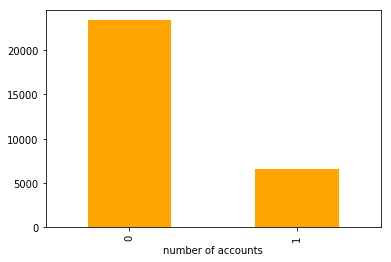

In [6]:
#look at the proportion of defaulting accounts vertical hist for presentation
%matplotlib inline
print('COUNT: 1 measures defaulting accounts, 0 measures paid accounts')
print('this will be the target/predicted value')
print(df['default payment next month'].value_counts(ascending=True))
print('')
d= df.groupby(['default payment next month']).size()
print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))

_= d.plot(kind='bar', color='orange')
_= plt.xlabel('number of accounts')
plt.show()

<h4> LIMIT_BAL, amount of household credit </h4>   
Ranges from 10,000 to 1,000,000, mean is 167,000.  The boxplots and violin plots show distribution concentrated below 200,000.
The accounts that default have lower credit than the accounts that don't.  
The amounts are in Taiwanese dollars.

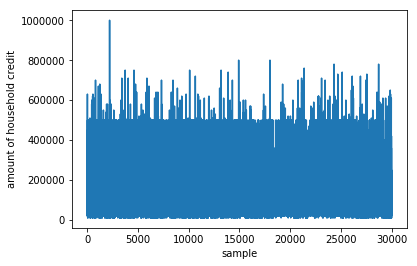

mean household credit:  167484.32266666667
max household credit:  1000000
min household credit:  10000


In [7]:
plt.plot(df['LIMIT_BAL'])
plt.xlabel('sample')
plt.ylabel('amount of household credit')
plt.show()
print("mean household credit: ", df['LIMIT_BAL'].mean())
print("max household credit: ", df['LIMIT_BAL'].max())
print("min household credit: ", df['LIMIT_BAL'].min())

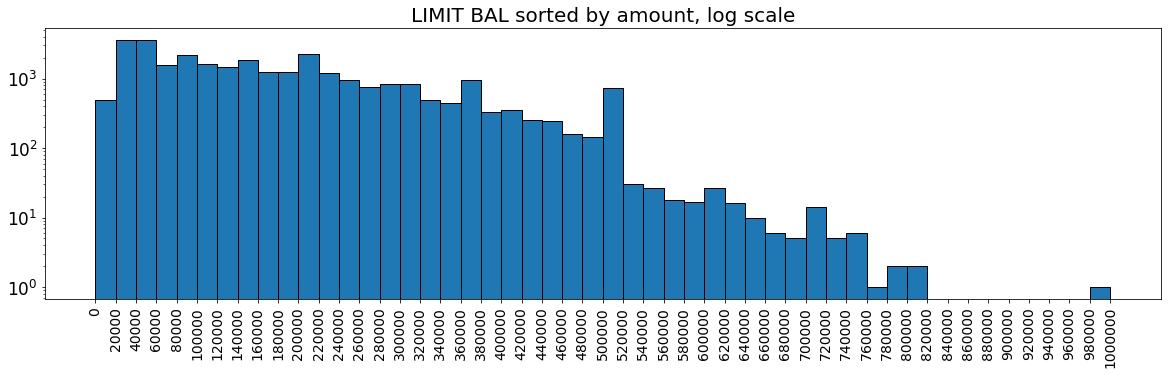

In [8]:
#limit balance, sorted by amount.
import matplotlib.pyplot as plt
bins= np.arange(0,1020000,20000)
_= plt.figure(figsize=(20,5))
_= plt.hist(df['LIMIT_BAL'], bins=bins, edgecolor="k")
_= plt.yscale("log")
_= plt.xticks(bins, rotation='vertical',size=14)
_= plt.yticks(size=17)
_= plt.title('LIMIT BAL sorted by amount, log scale', size=20)
plt.show()

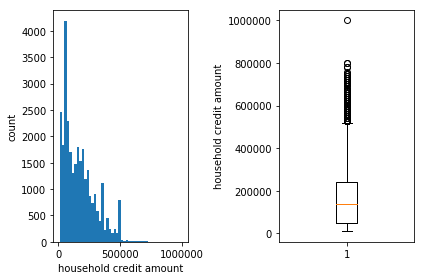

In [9]:
plt.subplot(1,2,1)
plt.xlabel('household credit amount')
plt.ylabel('count')
plt.hist(df['LIMIT_BAL'],bins=50)

plt.subplot(1,2,2)
plt.ylabel('household credit amount')
plt.boxplot(df['LIMIT_BAL'])
plt.subplots_adjust(hspace = .001)
plt.tight_layout()
plt.show()

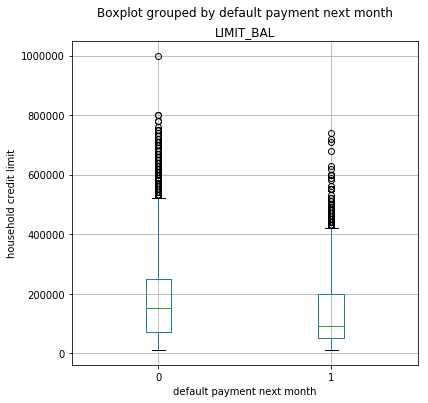

In [10]:
_= df.boxplot(column='LIMIT_BAL',by='default payment next month',
              labels=['paid bill','defaulted'], figsize=(6,6))
_= plt.ylabel('household credit limit')
plt.show()

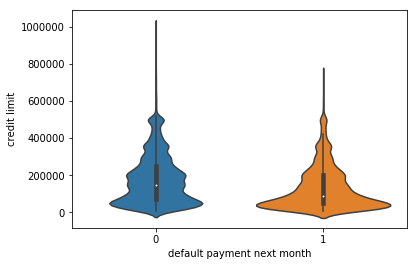

In [11]:
_= sns.violinplot(x='default payment next month', y='LIMIT_BAL', data=df)
_= plt.ylabel('credit limit')

plt.show()

<h4> SEX distribution: </h4> 
Show distribution of LIMIT BAL for each sex.
SEX:  18,112 female subjects, 11888 male subjects, approximately equally correlated.  
All values are 1 or 2 as expected; there is no need to clean up data.  

In [12]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

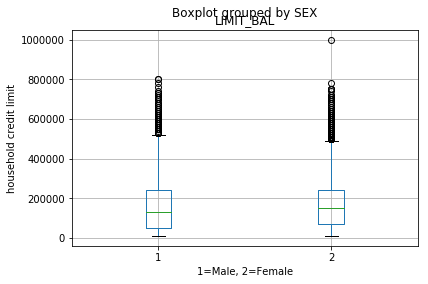

total male subjects:  11888
total female subjects:  18112


In [13]:
df.boxplot('LIMIT_BAL','SEX')
_= plt.ylabel('household credit limit')
_= plt.xlabel('1=Male, 2=Female')
plt.show()
print('total male subjects: ', sum(df['SEX']==1))
print('total female subjects: ', sum(df['SEX']==2))

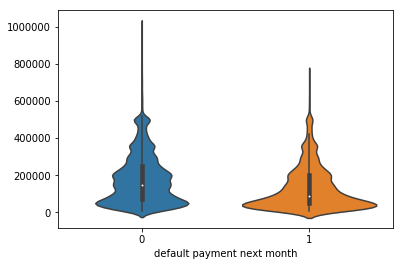

In [14]:
_= sns.violinplot(x='default payment next month', y='LIMIT_BAL', data=df)
_= plt.ylabel('')
plt.show()

<h4> EDUCATION </h4>
The majority have university or graduate education.  The valid codes are 1,2,3,4.  
Some entries have codes 0,5,6, which are undefined or invalid.  
345 entries are invalid.  I plan to change them to 4, meaning "other".  

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


No handles with labels found to put in legend.


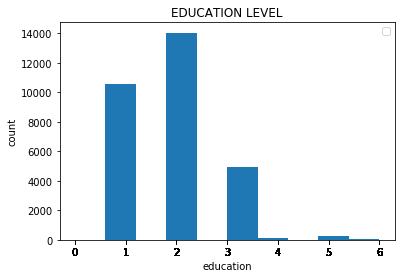

graduate school:  10585
university:       14030
high school:      4917
others:           123
invalid >4 :      331
invalid <1 :      14
lowest :  0
highest :  6
college grad or above:  0.8205 %


In [15]:
print("Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).")

_= plt.hist(df['EDUCATION'])
_= plt.xlabel('education')
_= plt.ylabel('count')
_= plt.xticks(df.EDUCATION)
_= plt.title('EDUCATION LEVEL') 
plt.legend()
plt.show()

print("graduate school: ",sum(df['EDUCATION']==1))
print("university:      ",sum(df['EDUCATION']==2))
print("high school:     ",sum(df['EDUCATION']==3))
print("others:          ",sum(df['EDUCATION']==4))
print("invalid >4 :     ",sum(df['EDUCATION']>4))
print("invalid <1 :     ",sum(df['EDUCATION']<1))
print("lowest : ", df['EDUCATION'].min())
print("highest : ", df['EDUCATION'].max())
print("college grad or above: ",(sum(df['EDUCATION']==1)+sum(df['EDUCATION']==2))/len(df),'%')

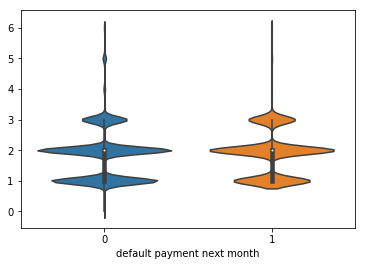

In [16]:
_= sns.violinplot(x='default payment next month', y='EDUCATION', data=df)
_= plt.ylabel('')
plt.show()

<h4> MARRIAGE </h4>
Approximately the same number of married as single subjects.  
Marital status (1 = married; 2 = single; 3 = others).  
323 subjects marked "other", and 54 have invalid "0" codes.  I'll change the 0s to 3s, so now 3 means other or unknown or invalid entry.  

Marital status (1 = married; 2 = single; 3 = others)


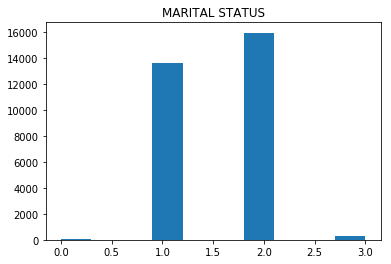

<bound method GroupBy.sum of <pandas.core.groupby.DataFrameGroupBy object at 0x1a262c6b00>>
1. married:  13659
2. single:  15964
3. others:  323
0. invalid: 54
4. invalid: 0


In [17]:
print("Marital status (1 = married; 2 = single; 3 = others)")
_ = plt.hist(df['MARRIAGE']) 
_ = plt.title('MARITAL STATUS') 
plt.show()
print(df.groupby('MARRIAGE').sum)
print("1. married: ", sum(df['MARRIAGE']==1))
print("2. single: ", sum(df['MARRIAGE']==2))
print("3. others: ", sum(df['MARRIAGE']==3))
print("0. invalid:", sum(df['MARRIAGE']<=0))
print("4. invalid:", sum(df['MARRIAGE']>3))

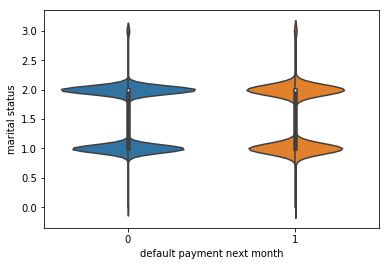

In [18]:
_= sns.violinplot(x='default payment next month', y='MARRIAGE', data=df)
_= plt.ylabel('marital status')
plt.show()

<h4> AGE distribution: </h4> 
Subjects' age is well distributed, with no outliers nor obvious errors.

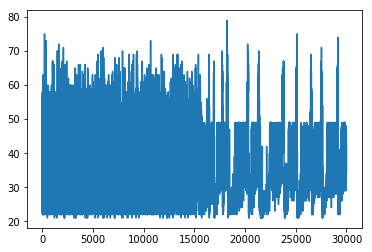

mean age:  35.4855
median age:  34.0
lowest age:  21
highest age:  79


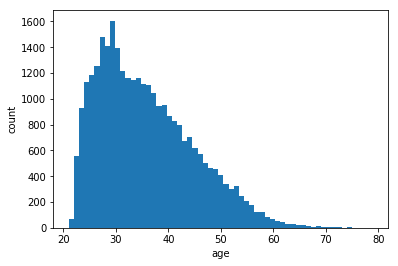

In [19]:
plt.plot(df['AGE'])
plt.show()
print("mean age: ", df['AGE'].mean())
print("median age: ", df['AGE'].median())
print("lowest age: ", df['AGE'].min())
print("highest age: ", df['AGE'].max())
plt.xlabel('age')
plt.ylabel('count')
plt.hist(df['AGE'],bins=59)
plt.show()

<h4> PAYMENT HISTORY: PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 </h4>
(Note that I changed PAY_0 to PAY_1 in clean_df)  
Show the payment history, for the entire data set.  
PAY_1 = repayment status in Sep 2005; PAY_2 = Aug; PAY_3 = Jul ... PAY_6 = April.
The measurement scale for the repayment status is: 
-1 = pay duly; 
1 = payment delay for one month; 
2 = payment delay for two months; . . .; 
8 = payment delay for eight months; 
9 = payment delay for nine months and above.

1 is most common, the highest is 8.  
-1 and -2 are also common.  Together they make up 8445 entries in September.  
The legend indicates -1 means pay duly.  Therefore 0 and -2 are invalid entries.  
I can guess at the meanings.  Perhaps data entry put in 0 to mean 0 months late (paid duly.)
Perhaps -2 meant they were paid in advance.  
I cannot ask about the meaning, or get advice on how to interpret, so I will combine all the -1 and -2 and 0 codes, and consider them all paid duly.  
(I might want to explore the invalid codes later also.)  
I showed small histograms of each to look for other outliers.

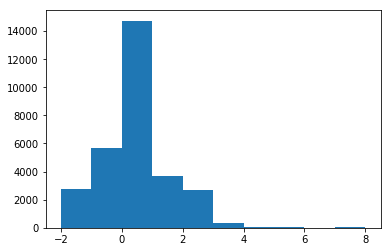

lowest:  -2   highest:  8
8 8 8 8 8 8
pay duly (all negative numbers):  8445
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


In [18]:
plt.hist(df['PAY_0'])
plt.show()
print("lowest: ",min(df['PAY_0']),"  highest: ",max(df['PAY_0']))
print(max(df['PAY_0']),max(df['PAY_2']),max(df['PAY_3']),max(df['PAY_4']),max(df['PAY_5']),max(df['PAY_6']))
print("pay duly (all negative numbers): ",sum(df['PAY_0']<0))  #sum the -1 and the -2 entries.
print(df['PAY_0'].value_counts())

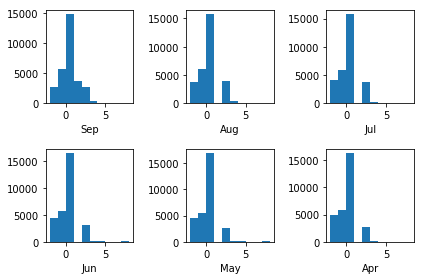

In [19]:
plt.subplot(2,3,1)
_= plt.hist(df['PAY_0'])
_ = plt.xlabel('Sep')

plt.subplot(2,3,2)
_= plt.hist(df['PAY_2'])
_ = plt.xlabel('Aug')

plt.subplot(2,3,3)
_= plt.hist(df['PAY_3'])
_ = plt.xlabel('Jul')

plt.subplot(2,3,4)
_= plt.hist(df['PAY_4'])
_ = plt.xlabel('Jun')

plt.subplot(2,3,5)
_= plt.hist(df['PAY_5'])
_ = plt.xlabel('May')

plt.subplot(2,3,6)
_= plt.hist(df['PAY_6'])
_ = plt.xlabel('Apr')

_= plt.tight_layout()
plt.show()

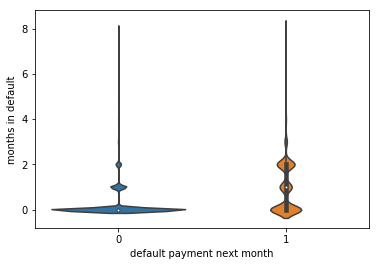

In [43]:
_= sns.violinplot(x='default payment next month', y='PAY_1', data=clean_df)
_= plt.ylabel('months in default')
plt.show()

This is significant.  Clearly, a higher number in 'PAY_0' correlates with a higher chance of 'default payment next month'  
A boxplot of the same information:

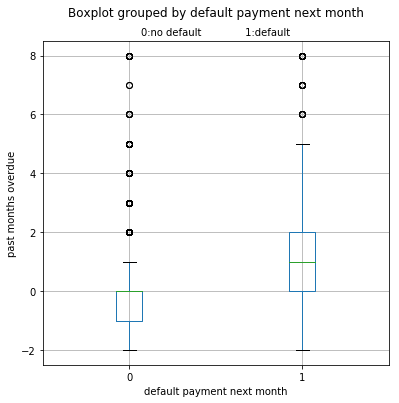

In [21]:
# PAY_0 from original dataframe, before cleaning data
_= df.boxplot(column='PAY_0',by='default payment next month',
            figsize=(6,6))
_= plt.ylabel('past months overdue')
_= plt.title('0:no default              1:default', size=10)
plt.show()

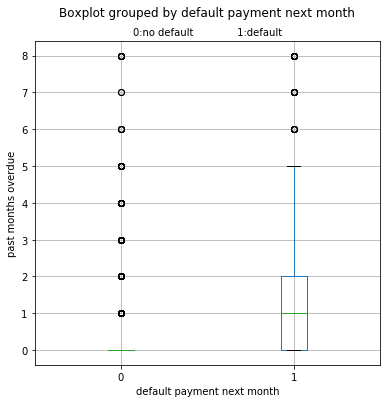

In [65]:
#PAY_1 from cleaned data frame (I changed negative values to 0)
bp= clean_df.boxplot(column='PAY_1',by='default payment next month', figsize=(6,6))
bp= plt.ylabel('past months overdue')
bp= plt.title('0:no default              1:default', size=10)
# plt.setp(bp['boxes'], color='orange')
plt.show()

In [41]:
# how often does PAY_1 equal 'default pay...'?
clean_df[clean_df['PAY_1']==clean_df['default payment next month']].count()

print(21227/30000)

0.7075666666666667


In [40]:
print(clean_df['PAY_1'].value_counts())
print(clean_df['default payment next month'].value_counts())

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64
0    23364
1     6636
Name: default payment next month, dtype: int64


In [39]:
"""PAY_1 > 0 means account in default already.  this will predict default next month.  
default_pay... == 1 means actual default.  
PAY_1 == 0 means predict no default.  then if default_pay... == 0, true negative.  
if default pay == 1, then false negative.  predicted good account, but got a default. """

clean_df['PAY_default'] = 0
for i in range(len(clean_df)):
    if (clean_df['PAY_1'][i] > 0):   #if predict positive for default
        if (clean_df['default payment next month'][i] == 1):
            clean_df['PAY_default'][i] = 1 #1 means true positive
        elif (clean_df['default payment next month'][i] != 1):
            clean_df['PAY_default'][i] = 2 #2 means false positive
    else:     #else predict negative
        if (clean_df['default payment next month'][i] == 1):
            clean_df['PAY_default'][i] = 3 #3 means false negative
        else:
            clean_df['PAY_default'][i] = 4 #4 means true negative
print(clean_df['PAY_default'].value_counts())
clean_df = clean_df.drop('PAY_default', axis=1)

4    19975
1     3429
2     3389
3     3207
Name: PAY_default, dtype: int64


In [26]:
print('recall: ')
print(3429/(3429+3207))

recall: 
0.5167269439421338


<h4> BILL AMOUNT HISTORY: BILL_1, BILL_2, BILL_3, BILL_4, BILL_5, BILL_6 </h4>
Show the bill history, for the entire data set, using mean.

The bill amounts rose sharply by 32% from April to September.  

Bill amounts in BILL_1, the most recent month, range from -165580 to 964511.  Most bills are zero, or near zero.  
I cannot measure any errors in data.  Negative amounts might mean the account was overpaid, leaving a credit instead of a debit.  
I showed small histograms of each to look for outliers.

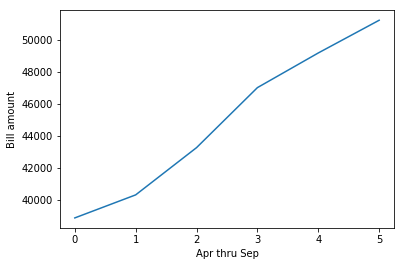

51223.3309
percent gain, Apr to Sep:  0.3177517656236634


In [27]:
bill_amt_sep = df['BILL_AMT1'].mean()
bill_amt_aug = df['BILL_AMT2'].mean()
bill_amt_jul = df['BILL_AMT3'].mean()
bill_amt_jun = df['BILL_AMT4'].mean()
bill_amt_may = df['BILL_AMT5'].mean()
bill_amt_apr = df['BILL_AMT6'].mean()
plt.plot([bill_amt_apr,bill_amt_may,bill_amt_jun,bill_amt_jul,bill_amt_aug,bill_amt_sep])
plt.xlabel('Apr thru Sep')
plt.ylabel('Bill amount')
plt.show()
print(df['BILL_AMT1'].mean())
print('percent gain, Apr to Sep: ', (bill_amt_sep-bill_amt_apr)/bill_amt_apr)

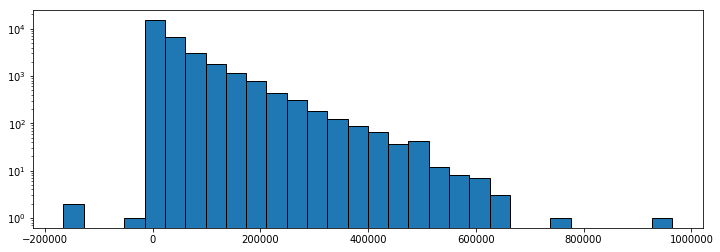

lowest value: -165,580
highest value: 964,511
total sum of all bills: 1,536,699,927


In [42]:
#histogram of most recent bill amounts:
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['BILL_AMT1'],bins=30, edgecolor="k")
#_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('lowest value:', format(min(clean_df['BILL_AMT1']),',d'))
print('highest value:', format(max(clean_df['BILL_AMT1']),',d'))
SepSum= sum(clean_df['BILL_AMT1'])
print('total sum of all bills:', format(SepSum, ',d'))

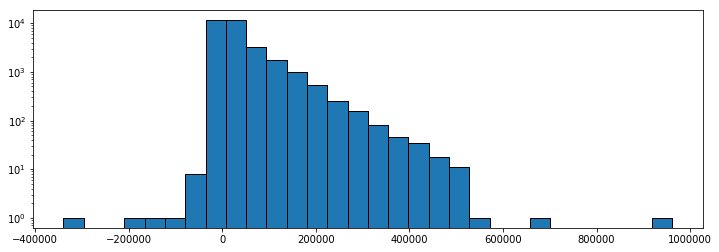

lowest value: -339,603
highest value: 961,664
total sum of all bills: 1,166,152,812


In [43]:
#repeat histogram for oldest month available
import matplotlib.pyplot as plt
_= plt.figure(figsize=(12,4))
_= plt.hist(clean_df['BILL_AMT6'],bins=30, edgecolor="k")
#_= plt.xticks(bins, rotation='vertical',size=10)
_= plt.yscale("log")
plt.show()
print('lowest value:', format(min(clean_df['BILL_AMT6']),',d'))
print('highest value:', format(max(clean_df['BILL_AMT6']),',d'))
AprSum= sum(clean_df['BILL_AMT6'])
print('total sum of all bills:', format(AprSum,',d'))

lowest bill amount is $-165,580!  This could indicate a credit, or it may be an error.  It appears to be one single account, so it should not affect our analysis if left as is.

In [ ]:
bins= np.arange(0,1020000,20000)


_= plt.yticks(size=17)
_= plt.title('LIMIT BAL sorted by amount, log scale', size=20)
plt.show()

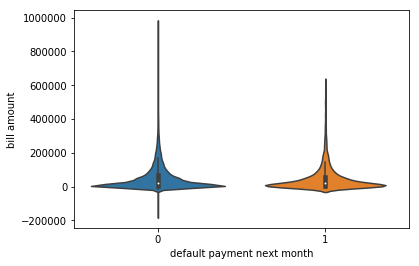

In [29]:
_= sns.violinplot(x='default payment next month', y='BILL_AMT1', data=df)
_= plt.ylabel('bill amount')
plt.show()

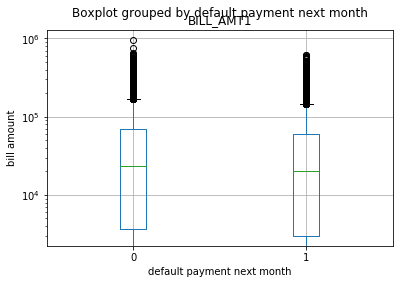

In [70]:
#box plot of same:
_= clean_df.boxplot(column='BILL_AMT1', by='default payment next month')
_= plt.ylabel('bill amount')
_= plt.yscale("log")
plt.show()

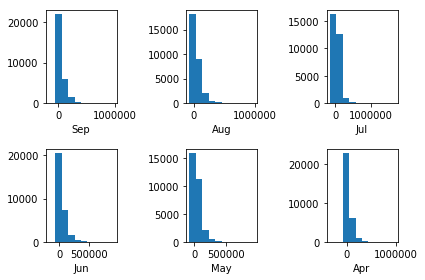

In [30]:
plt.subplot(2,3,1)
_= plt.hist(df['BILL_AMT1'])
_ = plt.xlabel('Sep')

plt.subplot(2,3,2)
_= plt.hist(df['BILL_AMT2'])
_ = plt.xlabel('Aug')

plt.subplot(2,3,3)
_= plt.hist(df['BILL_AMT3'])
_ = plt.xlabel('Jul')

plt.subplot(2,3,4)
_= plt.hist(df['BILL_AMT4'])
_ = plt.xlabel('Jun')

plt.subplot(2,3,5)
_= plt.hist(df['BILL_AMT5'])
_ = plt.xlabel('May')

plt.subplot(2,3,6)
_= plt.hist(df['BILL_AMT6'])
_ = plt.xlabel('Apr')

_= plt.tight_layout()
plt.show()

<h4> PAY AMOUNT HISTORY: PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 </h4>
Show the pay history, for the entire data set, using mean.  

I notice that only a small amount (11%) of the average bill amount is paid.  Most accounts carry a balance.  Like BILL_AMT, PAY_AMT increased over time.  
Payment amounts in PAY_AMT1, the most recent month, range from 0 to 873552.  Most bills are zero, or near zero.  
I cannot measure any errors in data.  There were no negative payments.    
I showed small histograms of each to look for outliers.

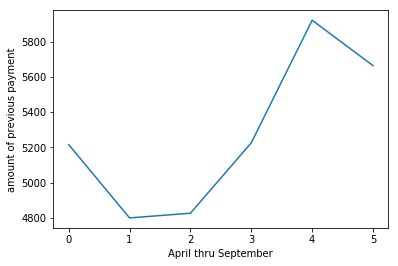

mean pay amount in Sep:  5663.5805
percent of total bill amounts paid in Sep:  0.11056642355134308


In [31]:
pymt_amt_sep = df['PAY_AMT1'].mean()
pymt_amt_aug = df['PAY_AMT2'].mean()
pymt_amt_jul = df['PAY_AMT3'].mean()
pymt_amt_jun = df['PAY_AMT4'].mean()
pymt_amt_may = df['PAY_AMT5'].mean()
pymt_amt_apr = df['PAY_AMT6'].mean()
plt.plot([pymt_amt_apr,pymt_amt_may,pymt_amt_jun,pymt_amt_jul,pymt_amt_aug,pymt_amt_sep])
plt.xlabel('April thru September')
plt.ylabel('amount of previous payment')
plt.show()
print('mean pay amount in Sep: ', pymt_amt_sep)
print('percent of total bill amounts paid in Sep: ',pymt_amt_sep/bill_amt_sep)

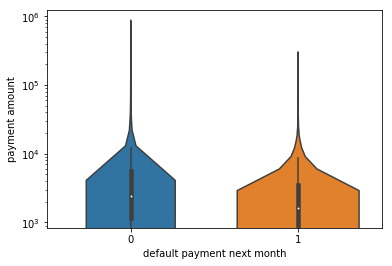

In [21]:
_= sns.violinplot(x='default payment next month', y='PAY_AMT1', data=df)
_= plt.ylabel('payment amount')
_= plt.yscale("log")
plt.show()

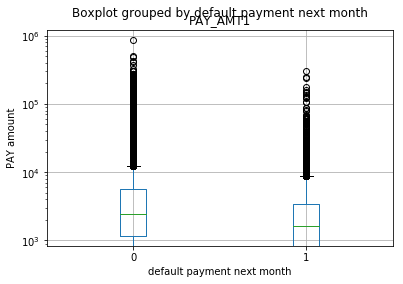

In [71]:
_= clean_df.boxplot(column='PAY_AMT1', by='default payment next month')
_= plt.ylabel('PAY amount')
_= plt.yscale("log")
plt.show()

In [ ]:
#box plot of same:
_= clean_df.boxplot(column='BILL_AMT1', by='default payment next month')
_= plt.ylabel('bill amount')
plt.show()

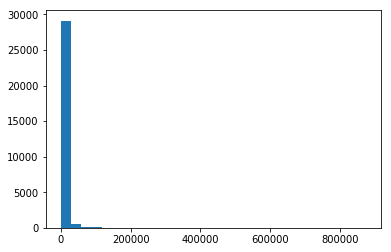

lowest value:  0
highest value:  873552


In [33]:
plt.hist(df['PAY_AMT1'],bins=30)
plt.show()
print('lowest value: ',min(df['PAY_AMT1']))
print('highest value: ',max(df['PAY_AMT1']))

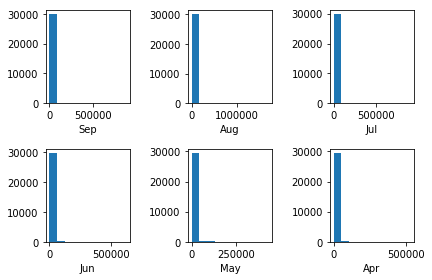

In [34]:
plt.subplot(2,3,1)
_= plt.hist(df['PAY_AMT1'])
_ = plt.xlabel('Sep')

plt.subplot(2,3,2)
_= plt.hist(df['PAY_AMT2'])
_ = plt.xlabel('Aug')

plt.subplot(2,3,3)
_= plt.hist(df['PAY_AMT3'])
_ = plt.xlabel('Jul')

plt.subplot(2,3,4)
_= plt.hist(df['PAY_AMT4'])
_ = plt.xlabel('Jun')

plt.subplot(2,3,5)
_= plt.hist(df['PAY_AMT5'])
_ = plt.xlabel('May')

plt.subplot(2,3,6)
_= plt.hist(df['PAY_AMT6'])
_ = plt.xlabel('Apr')

_= plt.tight_layout()
plt.show()

<h4> CLEAN UP DATA </h4>  
As specified above in my EDA, I need to clean the data.  
EDUCATION: valid codes are 1,2,3,4.  Change other codes to 4, meaning "others."  
MARRIAGE: valid codes are 1,2,3.  Change other codes to 3, meaning "other."  
PAY_0 to PAY_6: -1 indicates paid duly, 1,2,3,4,5,6,7,8 indicate how many months in default.  
    Change negative entries to 0, indicating paid duly, as 0 is easier to work with than -1.   
BILL_1 to BILL_6: There are no apparent errors in the data.  Do not change.  
PAY_AMT1 to PAY_AMT6: There were no negative payments, nor other apparent errors in the data.

In [35]:
# valid EDUCATION codes are 1,2,3,4.  Change other codes to 4, meaning "others."
for i in range (len(df)):
    if df['EDUCATION'][i] < 1:
        df['EDUCATION'][i] = 4
    elif df['EDUCATION'][i] > 4:
        df['EDUCATION'][i] = 4

In [36]:
# valid MARRIAGE codes are 1,2,3.  Change other codes to 3, meaning "other."
for i in range (len(df)):
    if df['MARRIAGE'][i] < 1:
        df['MARRIAGE'][i] = 3

print(df.groupby('MARRIAGE').sum)
print("married: ", sum(df['MARRIAGE']==1))
print("single: ", sum(df['MARRIAGE']==2))
print("others: ", sum(df['MARRIAGE']==3))
print("invalid:", sum(df['MARRIAGE']<=0))        

<bound method GroupBy.sum of <pandas.core.groupby.DataFrameGroupBy object at 0x1a35085f60>>
married:  13659
single:  15964
others:  377
invalid: 0


In [37]:
# PAY_0 to PAY_6.  change negative entries to 0, indicating paid duly. 
vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in range (len(df)):
    for var in vars:
        if df[var][i]<0:
            df[var][i] = 0
            
print(df['PAY_0'].value_counts())      

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64


In [20]:
#DATA CLEANING
clean_df = df
clean_df = clean_df.drop('ID', axis=1)

# valid EDUCATION codes are 1,2,3,4.  Change other codes to 4, meaning "others."
for i in range (len(clean_df)):
    if clean_df['EDUCATION'][i] < 1:
        clean_df['EDUCATION'][i] = 4
    elif clean_df['EDUCATION'][i] > 4:
        clean_df['EDUCATION'][i] = 4
        
# valid MARRIAGE codes are 1,2,3.  Change other codes to 3, meaning "other."
for i in range (len(clean_df)):
    if clean_df['MARRIAGE'][i] < 1:
        clean_df['MARRIAGE'][i] = 3     
        
# PAY_1 to PAY_6.  Change column name PAY_0 to PAY_1
# change negative entries to 0, indicating 0 months behind.  
# a positive integer represents the number of months behind.
clean_df=clean_df.rename(columns = {'PAY_0':'PAY_1'})
vars = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in range (len(clean_df)):
    for var in vars:
        if clean_df[var][i]<0:
            clean_df[var][i] = 0  
            
# Standardize the data frame, and create X for predictor variables, y for target
X = clean_df.drop('default payment next month', axis=1).values
y = clean_df['default payment next month'].values
X_scaled = scale(X)
target = 'default payment next month'

/Users/brentmarijensen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
